In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("Advertising.csv")
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [2]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [2]:
# Check for missing values
print(data.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


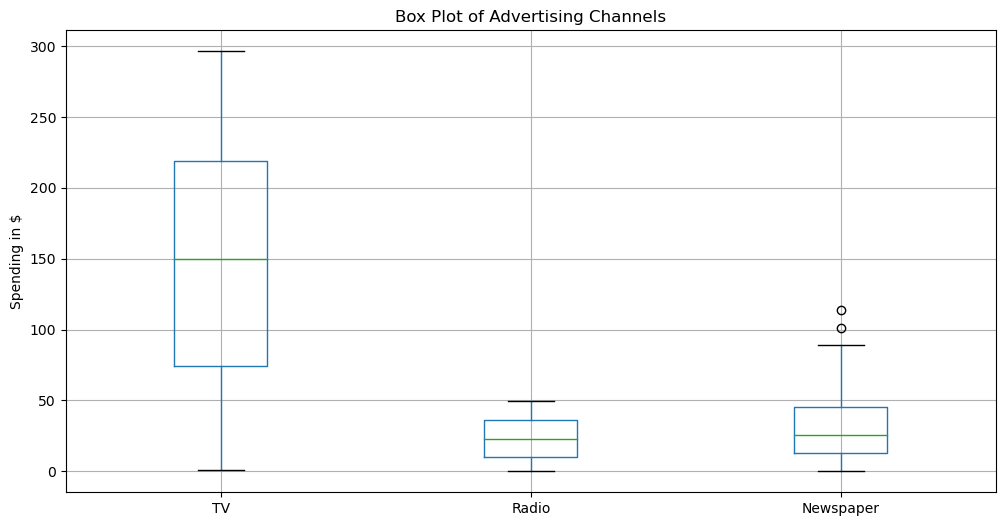

In [3]:
# Plot box plots for each advertising channel (TV, Radio, Newspaper)
plt.figure(figsize=(12, 6))
data.boxplot(column=['TV', 'Radio', 'Newspaper'])
plt.title('Box Plot of Advertising Channels')
plt.ylabel('Spending in $')
plt.xticks([1, 2, 3], ['TV', 'Radio', 'Newspaper'])
plt.show()

In [4]:
# Calculate the interquartile range (IQR) for each channel
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [5]:
# Identify outliers for each channel
outliers_tv = data[(data['TV'] < (Q1['TV'] - 1.5 * IQR['TV'])) | (data['TV'] > (Q3['TV'] + 1.5 * IQR['TV']))]
outliers_radio = data[(data['Radio'] < (Q1['Radio'] - 1.5 * IQR['Radio'])) | (data['Radio'] > (Q3['Radio'] + 1.5 * IQR['Radio']))]
outliers_newspaper = data[(data['Newspaper'] < (Q1['Newspaper'] - 1.5 * IQR['Newspaper'])) | (data['Newspaper'] > (Q3['Newspaper'] + 1.5 * IQR['Newspaper']))]


In [6]:
print("Outliers detected for TV:")
print(outliers_tv)
print("\nOutliers detected for Radio:")
print(outliers_radio)
print("\nOutliers detected for Newspaper:")
print(outliers_newspaper)

Outliers detected for TV:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []

Outliers detected for Radio:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []

Outliers detected for Newspaper:
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [16]:
#### It seems like there are no outliers detected for the 'TV' and 'Radio' channels based on the interquartile range (IQR) method, but there are outliers detected for the 'Newspaper' channel. Here are the outliers identified:
###Outliers detected for Newspaper:

### Row 16: TV = 67.8, Radio = 36.6, Newspaper = 114.0, Sales = 12.5
### Row 101: TV = 296.4, Radio = 36.3, Newspaper = 100.9, Sales = 23.8


In [17]:
# Handle missing values (if any)
# Example: data.fillna(0, inplace=True)

In [7]:
# Separate features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Assuming these are your features
y = data['Sales']  # Assuming 'Sales' is your target variable


In [8]:
from sklearn.preprocessing import StandardScaler
# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Check if there are any categorical variables in the features (X)
print(X.dtypes)


TV           float64
Radio        float64
Newspaper    float64
dtype: object


In [21]:
# One-hot encode categorical variables (if any)
#X_encoded = pd.get_dummies(X)  # This will only affect categorical columns, leaving numerical columns unchanged

# Display the encoded features
# print(X_encoded.head())

In [11]:
# Calculate the correlation matrix between features and the target variable
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [12]:
# Select features with high correlation coefficients with the target variable
target_variable = 'Sales'  # Assuming 'Sales' is the target variable
correlation_with_target = correlation_matrix[target_variable].abs()  # Absolute correlation values
high_correlation_threshold = 0.5  # Define a threshold for high correlation
# Select features with correlation above the threshold
highly_correlated_features = correlation_with_target[correlation_with_target > high_correlation_threshold].index.tolist()
print("\nFeatures with High Correlation with Target Variable:")
print(highly_correlated_features)




Features with High Correlation with Target Variable:
['TV', 'Sales']


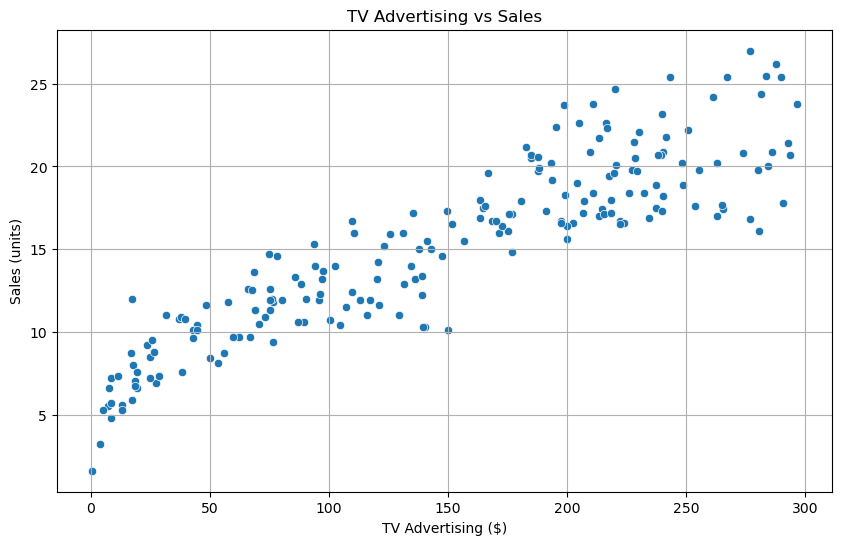

In [13]:
# Visualize the relationship between 'TV advertising' and 'sales' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales (units)')
plt.grid(True)
plt.show()

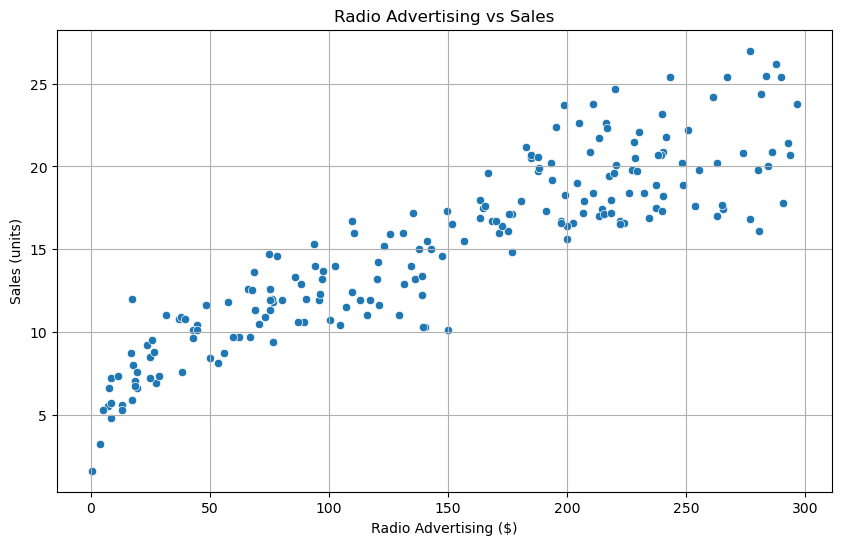

In [14]:
# Visualize the relationship between 'TV advertising' and 'sales' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising ($)')
plt.ylabel('Sales (units)')
plt.grid(True)
plt.show()

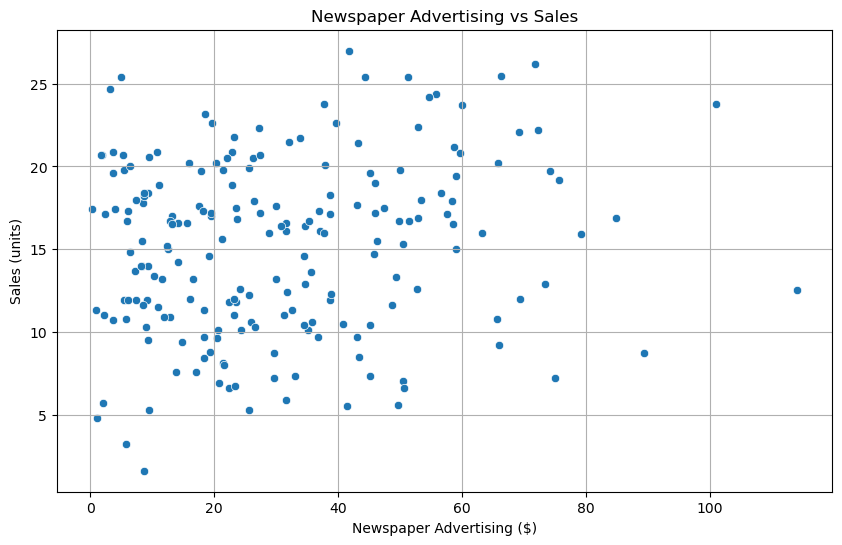

In [15]:
# Visualize the relationship between 'TV advertising' and 'sales' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising ($)')
plt.ylabel('Sales (units)')
plt.grid(True)
plt.show()

In [16]:
# Calculate the correlation coefficient between 'TV advertising' and 'sales'
correlation_tv_sales = data['TV'].corr(data['Sales'])
print("Correlation between TV advertising and sales:", correlation_tv_sales)


Correlation between TV advertising and sales: 0.9012079133023305


In [261]:
#### modeling LinearRegression

In [18]:
# Separate features (X) and target variable (y)
X = data[['TV']]  # Feature: TV advertising
y = data['Sales']  # Target variable: Sales


In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
linear_regressor = LinearRegression()
# Fit the model on the training data
linear_regressor.fit(X_train, y_train)



LinearRegression()

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_train' contains the actual target values in the training set
# Assuming 'train_predictions' contains the predicted values on the training set

# Calculate Mean Squared Error (MSE) on the training set
train_mse = mean_squared_error(y_train, train_predictions)
print("Mean Squared Error (MSE) on Training Set:", train_mse)

# Assuming 'y_test' contains the actual target values in the test set
# Assuming 'test_predictions' contains the predicted values on the test set

# Calculate Mean Squared Error (MSE) on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error (MSE) on Test Set:", test_mse)


Mean Squared Error (MSE) on Training Set: 4.998442356450173
Mean Squared Error (MSE) on Test Set: 6.101072906773963


In [242]:
## Training Set MSE (4.9984):

#### The training set MSE measures the average squared difference between the actual sales values and the predicted sales values on the training data.
####  A lower training set MSE suggests that the model fits well to the training data, indicating good performance in capturing the training data's patterns.
##### Test Set MSE (6.1011):

####### The test set MSE measures the average squared difference between the actual sales values and the predicted sales values on the test data (unseen data).
####### The test set MSE is slightly higher than the training set MSE, which is expected since models often perform slightly worse on unseen data compared to training data.
######## However, the test set MSE is still relatively close to the training set MSE, indicating that the model generalizes reasonably well to new data.
######### In summary, your model seems to have acceptable performance based on the MSE values, as the test set MSE is not significantly higher than the training set MSE. It's crucial 
# #######to monitor both training and test set performance to ensure the model's generalization and avoid overfitting.

In [23]:


# Calculate R-squared (R2) on the training set
r2_train = r2_score(y_train, train_predictions)
print("R-squared (R2) on Training Set:", r2_train)

# Calculate Root Mean Squared Error (RMSE) on the training set
rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
print("Root Mean Squared Error (RMSE) on Training Set:", rmse_train)
# Calculate Mean Squared Error (MSE) on the training set
train_mse = mean_squared_error(y_train, train_predictions)
print("Mean Squared Error (MSE) on Training Set:", train_mse)
# Calculate Mean Squared Error (MSE) on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error (MSE) on Test Set:", test_mse)


R-squared (R2) on Training Set: 0.8134866044709264
Root Mean Squared Error (RMSE) on Training Set: 2.235719650683013
Mean Squared Error (MSE) on Training Set: 4.998442356450173
Mean Squared Error (MSE) on Test Set: 6.101072906773963


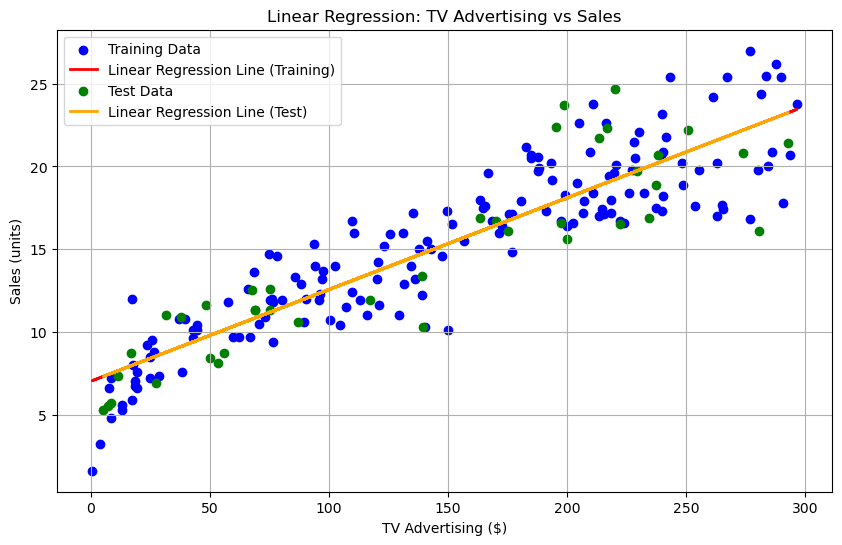

In [24]:
# Plotting the actual data points and the regression lines
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, train_predictions, color='red', linewidth=2, label='Linear Regression Line (Training)')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, test_predictions, color='orange', linewidth=2, label='Linear Regression Line (Test)')

plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales (units)')
plt.title('Linear Regression: TV Advertising vs Sales')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
##### DECISION TREE

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
# Fit the model on the training data
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [57]:
# Make predictions on the training set
train_predictions = tree_regressor.predict(X_train)
# Calculate R-squared (R2) on the training set
r2_train = r2_score(y_train, train_predictions)
print("R-squared (R2) on Training Set:", r2_train)
# Calculate Root Mean Squared Error (RMSE) on the training set
rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
print("Root Mean Squared Error (RMSE) on Training Set:", rmse_train)
# Make predictions on the test set
test_predictions = tree_regressor.predict(X_test)
# Calculate R-squared (R2) on the test set
r2_test = r2_score(y_test, test_predictions)
print("R-squared (R2) on Test Set:", r2_test)
# Calculate Root Mean Squared Error (RMSE) on the test set
rmse_test = mean_squared_error(y_test, test_predictions, squared=False)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_test)





R-squared (R2) on Training Set: 0.9913617387206112
Root Mean Squared Error (RMSE) on Training Set: 0.48114446894877627
R-squared (R2) on Test Set: 0.8040178990391927
Root Mean Squared Error (RMSE) on Test Set: 2.4609068450471665


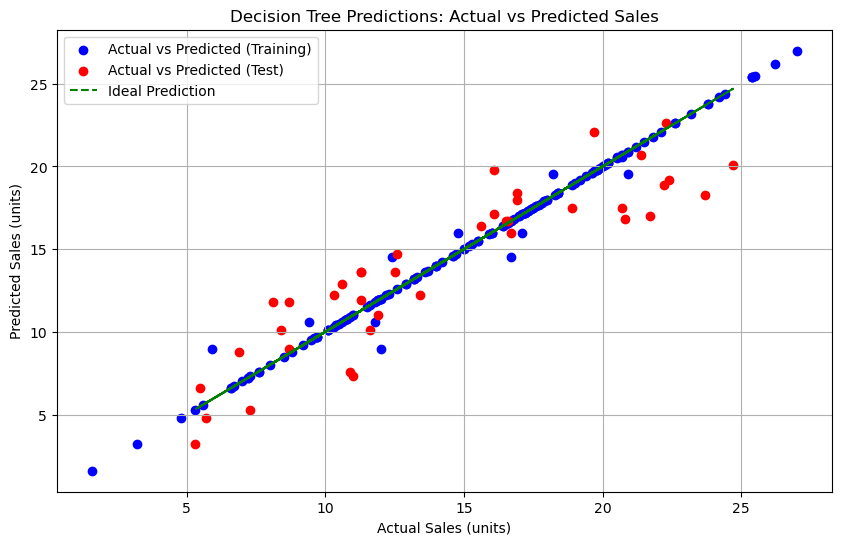

In [58]:
# Visualize actual vs predicted values on the test set
plt.figure(figsize=(10, 6))

# Plot training predictions
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')

# Plot test predictions
plt.scatter(y_test, test_predictions, color='red', label='Actual vs Predicted (Test)')

# Plot the ideal prediction line
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Sales (units)')
plt.ylabel('Predicted Sales (units)')
plt.title('Decision Tree Predictions: Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

In [247]:
#### Mean Squared Error (MSE): The MSE value of approximately 6.06 indicates the average squared difference between the actual sales
#### values and the predicted sales values. Lower MSE values are better, as they indicate that the model's predictions are closer to the actual values. In your case, an MSE of 6.06 suggests decent predictive performance, but the exact interpretation depends on the context of your data and the specific problem you're trying to solve.
##### R-squared Score: The R-squared score of about 0.804 indicates the proportion of variance in the target variable (Sales) that is explained by the
##### independent variable (TV advertising) in your model. R-squared values range from 0 to 1, with higher values indicating a better fit. An R-squared of 0.804 suggests that approximately 80.4% of the variance in Sales can be explained by TV advertising, which is a reasonably good fit.
##### These metrics provide valuable insights into how well your linear regression model is performing. While the MSE gives you an idea of the error magnitude, the R-squared score gives you an indication of how much of the variability in the target variable your model captures.

In [59]:
### RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest regression model
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# Calculate Mean Squared Error (MSE) on the training set
train_mse = mean_squared_error(y_train, train_predictions)
print("Mean Squared Error (MSE) on Training Set:", train_mse)

# Calculate R-squared (R2) on the training set
r2_train = r2_score(y_train, train_predictions)
print("R-squared Score on Training Set:", r2_train)
mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error (MSE) on Test Set:", mse)
r2 = r2_score(y_test, test_predictions)
print("R-squared Score on Test Set:", r2)



Mean Squared Error (MSE) on Training Set: 0.23149999999999996
R-squared Score on Training Set: 0.9913617387206112
Mean Squared Error (MSE) on Test Set: 6.0560624999999995
R-squared Score on Test Set: 0.8040178990391927


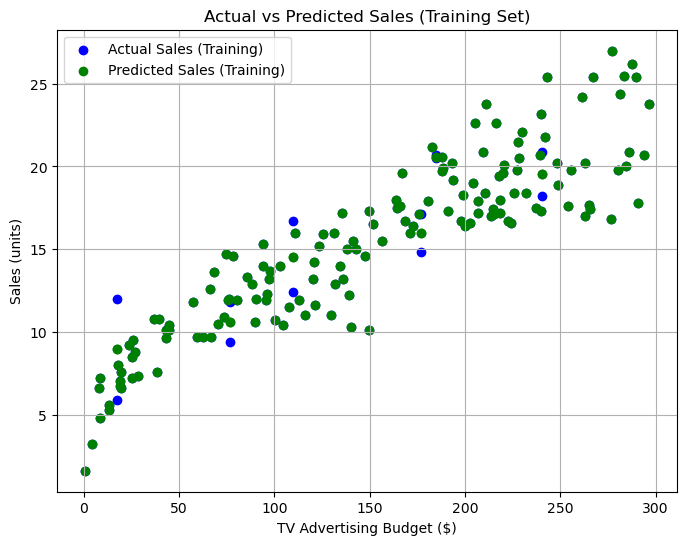

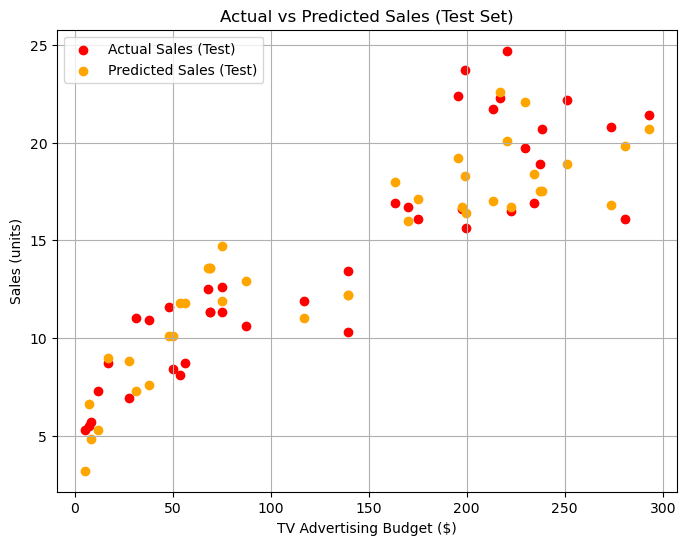

In [62]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for training set
plt.figure(figsize=(8, 6))
plt.scatter(X_train['TV'], y_train, color='blue', label='Actual Sales (Training)')
plt.scatter(X_train['TV'], train_predictions, color='green', label='Predicted Sales (Training)')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales (units)')
plt.title('Actual vs Predicted Sales (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting actual vs predicted values for test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test['TV'], y_test, color='red', label='Actual Sales (Test)')
plt.scatter(X_test['TV'], test_predictions, color='orange', label='Predicted Sales (Test)')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales (units)')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
#### KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Separate features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Example: K=5
knn_regressor.fit(X_train_scaled, y_train)

# Evaluate model
train_predictions = knn_regressor.predict(X_train_scaled)
test_predictions = knn_regressor.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 1.8317275
Test MSE: 2.9800299999999984


In [68]:
# Calculate MSE and R-squared score on training set
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
# Calculate MSE and R-squared score on test set
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
print("KNN Regression Performance:")
print("Train Set MSE:", train_mse)
print("Train Set R-squared Score:", train_r2)
print("Test Set MSE:", test_mse)
print("Test Set R-squared Score:", test_r2)




KNN Regression Performance:
Train Set MSE: 1.8317275
Train Set R-squared Score: 0.9316503639842691
Test Set MSE: 2.9800299999999984
Test Set R-squared Score: 0.9035623327324918


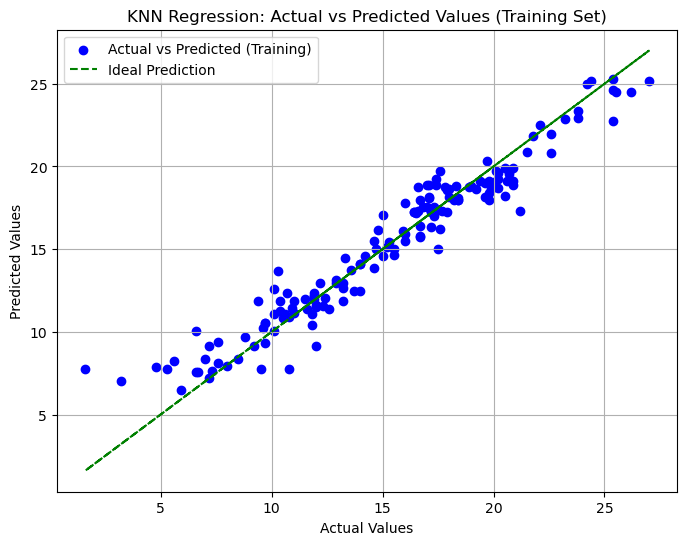

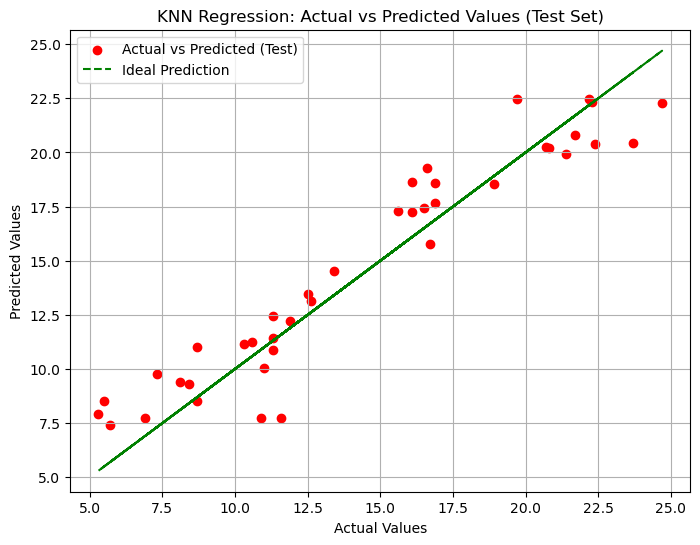

In [69]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')
plt.plot(y_train, y_train, color='green', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted Values (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting actual vs predicted values for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='red', label='Actual vs Predicted (Test)')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


Selected Features:
TV: Score 689.1241411471246
Radio: Score 20.944559344784903
Newspaper: Score 3.4209782785287675


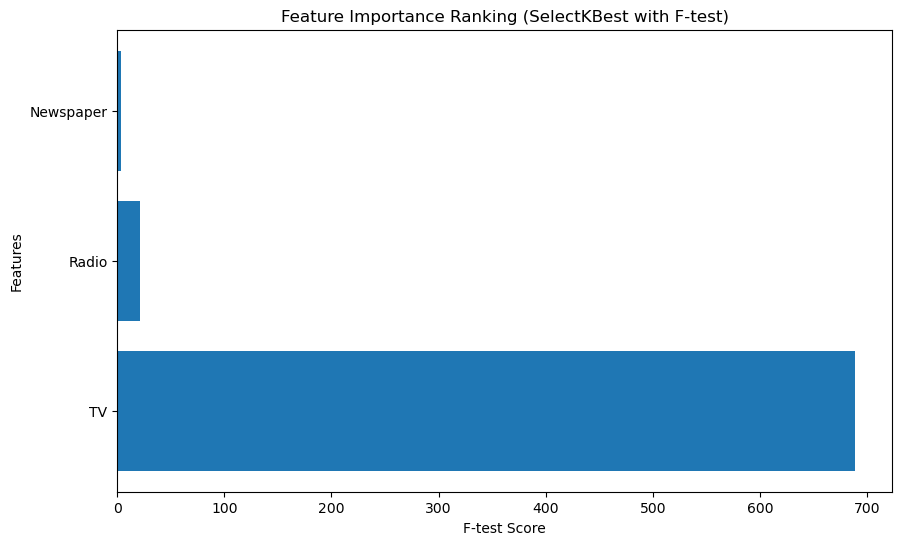

In [71]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor()

# Initialize SelectKBest with F-test scoring
select_k_best = SelectKBest(score_func=f_regression, k='all')  # Choose 'all' or specify the number of features (k)

# Fit SelectKBest on training data and transform features
X_train_selected = select_k_best.fit_transform(X_train, y_train)

# Get the indices of the selected features based on their scores
selected_feature_indices = select_k_best.get_support(indices=True)

# Print the selected features and their scores
print("Selected Features:")
for idx, feature in enumerate(X_train.columns[selected_feature_indices]):
    print(f"{feature}: Score {select_k_best.scores_[idx]}")

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(select_k_best.scores_)), select_k_best.scores_)
plt.yticks(range(len(select_k_best.scores_)), X_train.columns)
plt.xlabel('F-test Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking (SelectKBest with F-test)')
plt.show()
